In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
print(tf.__version__)

1.12.0


In [3]:
QBtrain = pd.read_csv('TrainingBig/QBtrain.csv')
QBtrain.columns

Index(['Unnamed: 0', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'Third

In [4]:
QBtrain = QBtrain.drop('Unnamed: 0', axis=1)

In [5]:
QBtrain.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,...,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000,1812.000000
mean,19.474742,30.543146,59.850234,222.643039,6.912527,1.381104,0.710980,85.394647,2.779120,11.481418,...,55.596689,6.201821,14.921137,95.567329,63.184437,238.903754,6.793709,10.746247,1.582307,88.343267
std,7.484796,11.096326,16.568473,87.684187,2.228754,0.796165,0.525765,26.359058,1.953534,12.184658,...,8.786838,1.312856,2.274022,120.541977,3.424158,24.240177,0.601768,0.751066,0.368463,9.207363
min,0.000000,0.000000,0.000000,-0.666667,-0.700000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,34.800000,3.000000,10.300000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,17.641234,29.000000,59.400000,193.500000,6.506818,1.000000,0.333333,78.902500,1.412500,2.062500,...,50.000000,5.400000,13.300000,34.062500,60.600000,224.968750,6.400000,10.200000,1.312500,82.000000
50%,21.400000,33.303846,63.626786,244.316667,7.284524,1.400000,0.666667,90.520909,2.333333,7.563492,...,55.300000,6.200000,14.400000,35.625000,63.200000,237.687500,6.800000,10.700000,1.562500,88.000000
75%,24.114583,37.148810,67.164394,275.000000,7.925893,2.000000,1.000000,99.870000,3.750000,17.354167,...,60.000000,7.100000,16.400000,39.562500,64.900000,251.250000,7.200000,11.200000,1.875000,94.000000
max,39.000000,53.000000,100.000000,439.000000,22.000000,5.000000,4.000000,158.330000,14.000000,104.000000,...,88.900000,10.100000,22.300000,419.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [6]:
QBtrain.head()

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [7]:
QBtrain.columns

Index(['Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts',

In [8]:
df = QBtrain.drop(['Name', 'Home'], axis=1).astype('float64')

In [9]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(df)
y_noano = clf.predict(df)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = df.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 182
Number of rows without outliers: 1630


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [10]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [11]:
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CompletionsGame,1450.0,19.409810,7.593651,0.000000,17.546703,21.414286,24.104167,37.000000
AttemptsGame,1450.0,30.365662,11.247904,0.000000,29.000000,33.292857,37.000000,52.000000
PassingCompletionPercentage,1450.0,59.832175,17.132151,0.000000,59.592500,63.728571,67.300000,100.000000
YardsGame,1450.0,221.697335,89.073045,-0.666667,192.257143,244.400000,275.412338,439.000000
PassingYardsPerAttempt,1450.0,6.903875,2.305901,-0.700000,6.500000,7.288750,7.950000,22.000000
PassingTouchdownsGame,1450.0,1.382629,0.809174,0.000000,1.000000,1.400000,2.000000,4.333333
InterceptionsGame,1450.0,0.703468,0.525692,0.000000,0.333333,0.666667,1.000000,4.000000
PassingRating,1450.0,85.466426,27.138490,0.000000,78.610714,90.817143,100.069904,158.330000
RushingAttemptsGame,1450.0,2.734817,1.938589,0.000000,1.400000,2.333333,3.714286,14.000000
RushingYardsGame,1450.0,11.151122,12.150858,-7.000000,2.000000,7.118056,16.600000,104.000000


In [12]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
df_labels = df.pop('Score')

In [13]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_df = norm(df)

In [14]:
def build_model():
  model = keras.Sequential([
    layers.Dense(40, activation=tf.nn.leaky_relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [15]:
model = build_model()

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________


In [17]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-1.3352859 ],
       [-2.4110293 ],
       [ 0.82193226],
       [-0.14675051],
       [-0.5070576 ],
       [-1.4902517 ],
       [-0.1642678 ],
       [-0.861686  ],
       [-0.5867959 ],
       [-1.3631794 ]], dtype=float32)

In [18]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,78.907998,7.043515,78.907998,19.043094,3.420303,19.043094,495
496,82.477119,7.046912,82.477119,19.012039,3.414243,19.012039,496
497,83.092472,7.147510,83.092472,18.789822,3.390074,18.789822,497
498,78.187219,7.001211,78.187219,19.084581,3.420997,19.084581,498
499,78.755051,7.029354,78.755051,18.945437,3.385678,18.945437,499


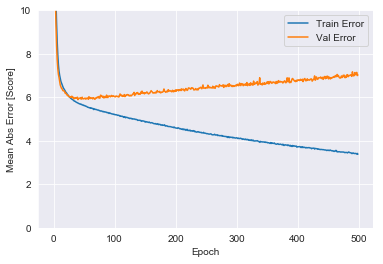

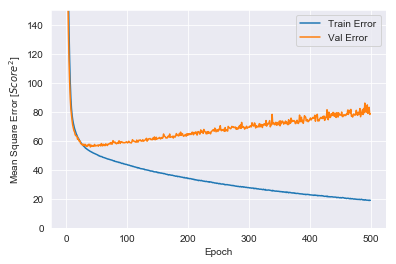

In [20]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Score]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,10])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Score^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,150])

plot_history(history)

In [21]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Score".format(mae))

Testing set Mean Abs Error:  7.02 Score



..........................................................

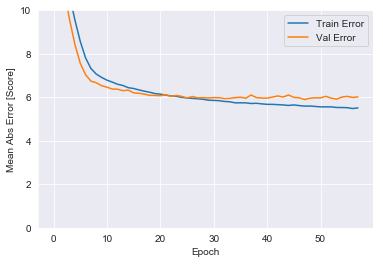

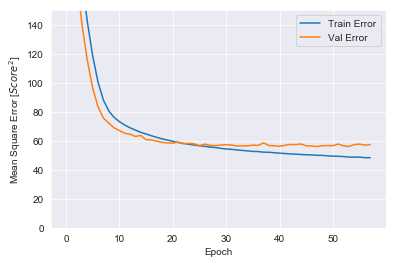

In [22]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [23]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Score".format(mae))

Testing set Mean Abs Error:  6.01 Score


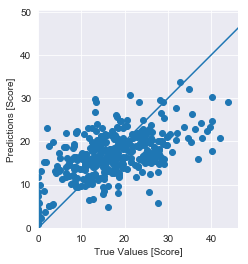

In [24]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Score]')
plt.ylabel('Predictions [Score]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

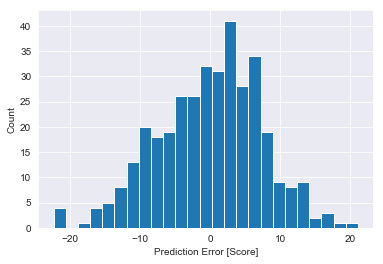

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Score]")
_ = plt.ylabel("Count")

In [26]:
def build_model():
  model = keras.Sequential([
    layers.Dense(40, activation=tf.nn.leaky_relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


....................

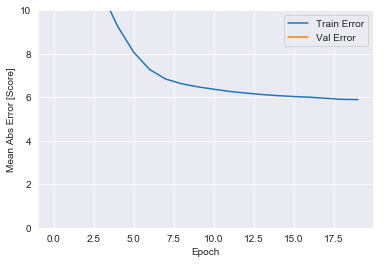

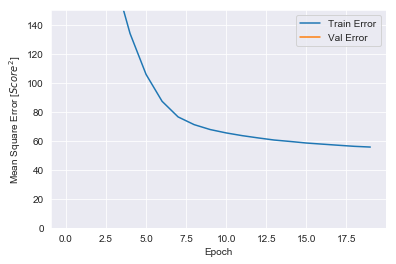

In [27]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_df, df_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [28]:
Offense = pd.read_csv('Input/Offense/Offense.csv')
Offense = Offense.set_index('Team')
Offense.head()


,PointsPerGame,Score,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,...,OpponentTacklesForLossPercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
SF,21.7,239,693,3907,5.6,239,129,38.0,34,47.1,...,27.4,9.1,19.9,351,61.5,2423,6.9,11.2,18,83
CHI,28.8,317,689,3843,5.6,235,134,42.5,36,66.7,...,19.9,6.0,12.6,359,66.3,2576,7.2,10.8,22,97
CIN,25.1,276,645,3665,5.7,223,122,38.5,32,78.1,...,26.2,5.2,9.9,402,61.9,2636,6.6,10.6,22,88
BUF,14.6,161,688,3013,4.4,178,153,30.1,22,59.1,...,24.2,9.2,19.2,336,55.1,1758,5.2,9.5,6,56
DEN,22.9,252,681,4027,5.9,222,137,34.3,34,55.9,...,16.7,6.2,16.5,392,62.8,2655,6.8,10.8,14,84


In [29]:
Offense['Played'] = Offense['Score'] / Offense['PointsPerGame']

In [30]:
Offense['OffensivePlays'] = Offense['OffensivePlays'] / Offense['Played']
Offense['OffensiveYards'] = Offense['OffensiveYards'] / Offense['Played']
Offense['FirstDowns'] = Offense['FirstDowns'] / Offense['Played']
Offense['ThirdDownAttempts'] = Offense['ThirdDownAttempts'] / Offense['Played']
Offense['RedZoneAttempts'] = Offense['RedZoneAttempts'] / Offense['Played']
Offense['PassingAttempts'] = Offense['PassingAttempts'] / Offense['Played']
Offense['PassingYards'] = Offense['PassingYards'] / Offense['Played']
Offense['PassingTouchdowns'] = Offense['PassingTouchdowns'] / Offense['Played']

In [31]:
QBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'TimesSackedPercentage', 'OpponentQuarterbackHitsPercentage']]

In [32]:
RBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'OpponentTacklesForLossPercentage']]

In [33]:
WROffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'PassingAttempts', 'CompletionPercentage', 'PassingYards', 'TeamPassingYardsPerAttempt', \
                    'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating']]

In [34]:
Def = pd.read_csv('Input/Defense/Def.csv')
Def['Opponent'] = Def['Team']
Def = Def.drop('Team', axis=1)
Def = Def.set_index('Opponent')
Def.head()

,OpponentPointsPerGame,OpponentScore,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentRushingTouchdowns,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
Opponent,,,,,,,,,,,,,,,,,,,,,
SF,26.6,293,703,3854,5.5,228,146,39.0,42,59.5,...,6.2,15.2,8,394,61.9,2724,6.9,11.2,23,100
CHI,19.2,211,703,3477,4.9,200,151,35.1,28,60.7,...,7.5,14.5,4,421,63.9,2588,6.1,9.6,19,76
CIN,31.5,347,780,4836,6.2,285,156,55.1,44,70.5,...,5.5,14.2,14,413,67.3,3214,7.8,11.6,25,100
BUF,24.7,272,676,3355,5.0,212,144,38.2,35,68.6,...,7.3,17.1,12,357,63.6,2131,6.0,9.4,15,82
DEN,22.9,252,719,4282,6.0,220,149,39.6,34,58.8,...,7.7,16.0,8,398,64.6,2928,7.4,11.4,20,91


In [35]:
Def['Played'] = Def['OpponentScore'] / Def['OpponentPointsPerGame']

In [36]:
Def['OpponentOffensivePlays'] = Def['OpponentOffensivePlays'] / Def['Played']
Def['OpponentOffensiveYards'] = Def['OpponentOffensiveYards'] / Def['Played']
Def['OpponentFirstDowns'] = Def['OpponentFirstDowns'] / Def['Played']
Def['OpponentThirdDownAttempts'] = Def['OpponentThirdDownAttempts'] / Def['Played']
Def['OpponentRedZoneAttempts'] = Def['OpponentRedZoneAttempts'] / Def['Played']
Def['OpponentRushingYards'] = Def['OpponentRushingYards'] / Def['Played']
Def['OpponentPassingYards'] = Def['OpponentPassingYards'] / Def['Played']
Def['OpponentPassingTouchdowns'] = Def['OpponentPassingTouchdowns'] / Def['Played']
Def['OpponentRushingTouchdowns'] = Def['OpponentRushingTouchdowns'] / Def['Played']

In [37]:
QBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentTimesSackedPercentage', 'QuarterbackHitsPercentage', 'OpponentPassingAttempts', \
            'OpponentCompletionPercentage', 'OpponentPassingYards', 'OpponentPassingYardsPerAttempt', \
            'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns', 'OpponentPasserRating']]

In [38]:
RBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentRushingYards', 'OpponentRushingYardsPerAttempt', 'TacklesForLossPercentage', 'OpponentRushingTouchdowns']]

In [39]:
QB = pd.read_csv('Input/Aggregate/QBAggregate.csv')
QBavg = pd.DataFrame()

QBavg['Name'] = QB['Name']
QBavg['Team'] = QB['Team']
QBavg['Rank'] = QB['Rank']
QBavg['CompletionsGame'] = QB['PassingCompletions'] / QB['Played']
QBavg['AttemptsGame'] = QB['PassingAttempts'] / QB['Played']
QBavg['PassingCompletionPercentage'] = QB['PassingCompletionPercentage']
QBavg['YardsGame'] = QB['PassingYards'] / QB['Played']
QBavg['PassingYardsPerAttempt'] = QB['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QB['PassingTouchdowns'] / QB['Played']
QBavg['InterceptionsGame'] = QB['PassingInterceptions'] / QB['Played']
QBavg['PassingRating'] = QB['PassingRating']
QBavg['RushingAttemptsGame'] = QB['RushingAttempts'] / QB['Played']
QBavg['RushingYardsGame'] = QB['RushingYards'] / QB['Played']
QBavg['RushingYardsPerAttempt'] = QB['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QB['RushingTouchdowns'] / QB['Played']
QBavg['PointsGame'] = QB['FantasyPointsPerGameDraftKings']

QBavg = QBavg.set_index('Name')
QBavg.head()

,Team,Rank,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame
Name,,,,,,,,,,,,,,,
Patrick Mahomes,KC,1,24.000000,35.545455,67.5,329.818182,9.3,3.363636,0.909091,117.90,3.818182,16.909091,4.4,0.181818,30.8
Ben Roethlisberger,PIT,2,28.363636,42.909091,66.1,333.090909,7.8,2.181818,1.090909,95.87,2.181818,8.545455,3.9,0.272727,25.8
Matt Ryan,ATL,3,28.181818,39.454545,71.4,334.818182,8.5,2.181818,0.454545,110.60,2.000000,8.818182,4.4,0.181818,25.6
Jared Goff,LAR,4,23.454545,34.636364,67.7,322.454545,9.3,2.363636,0.545455,113.49,3.181818,8.000000,2.5,0.090909,25.4
Drew Brees,NO,5,24.727273,32.363636,76.4,285.000000,8.8,2.636364,0.181818,127.26,2.181818,2.181818,1.0,0.272727,25.3


In [40]:
QBRZ = pd.read_csv('Input/RZ/QBRZ.csv')

QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZ['Name']
QBRZavg['RZCompletionsGame'] = QBRZ['PassingCompletions'] / QBRZ['Played']
QBRZavg['RZAttemptsGame'] = QBRZ['PassingAttempts'] / QBRZ['Played']
QBRZavg['RZPassingCompletionPercentage'] = QBRZ['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZ['PassingYards'] / QBRZ['Played']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZ['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZ['PassingTouchdowns'] / QBRZ['Played']
QBRZavg['RZInterceptionsGame'] = QBRZ['PassingInterceptions'] / QBRZ['Played']
QBRZavg['RZPassingRating'] = QBRZ['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZ['RushingAttempts'] / QBRZ['Played']
QBRZavg['RZRushingYardsGame'] = QBRZ['RushingYards'] / QBRZ['Played']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZ['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZ['RushingTouchdowns'] / QBRZ['Played']
QBRZavg['RZPointsGame'] = QBRZ['FantasyPointsPerGameDraftKings']

QBRZ = QBRZavg.set_index('Name')
QBRZ.head()

,RZCompletionsGame,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
Name,,,,,,,,,,,,,
Patrick Mahomes,3.909091,5.909091,66.2,31.545455,5.3,2.272727,0.090909,112.63,1.090909,3.818182,3.5,0.181818,11.7
Andrew Luck,4.181818,6.636364,63.0,31.909091,4.8,2.363636,0.090909,108.50,0.272727,1.272727,4.7,0.000000,11.1
Drew Brees,4.545455,6.545455,69.4,28.909091,4.4,1.818182,0.000000,117.94,0.454545,1.090909,2.4,0.272727,10.4
Cam Newton,2.909091,3.909091,74.4,19.818182,5.1,1.545455,0.090909,115.12,1.363636,4.727273,3.5,0.363636,9.9
Jared Goff,4.090909,6.727273,60.8,29.727273,4.4,1.727273,0.181818,99.49,0.545455,1.181818,2.2,0.090909,9.1


In [41]:
QBsnaps = pd.read_csv('Input/Aggregate/QBSnaps.csv')
QBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jeff Driskel,CIN,QB,4,61,15.2,8.9,9.8,0.0,68.9,68.9,30.46,49.9
1,2,Patrick Mahomes,KC,QB,11,715,65.0,100.0,5.9,0.0,60.6,60.6,338.72,47.4
2,3,Ryan Fitzpatrick,TB,QB,8,428,53.5,54.2,8.4,0.0,65.9,65.9,190.84,44.6
3,4,Cam Newton,CAR,QB,11,684,62.2,98.8,12.4,0.0,64.9,64.9,264.66,38.7
4,5,Drew Brees,NO,QB,11,722,65.6,97.3,3.3,0.1,52.8,52.8,277.90,38.5


In [42]:
QBsnaps = QBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
QBsnaps = QBsnaps.set_index('Name')

In [43]:
Defense = pd.read_csv('Input/Defense/Defense.csv')
QBDef = pd.DataFrame()
QBDef['Team'] = Defense['Team']
QBDef['DPointsAllowed'] = Defense['DraftKingsQuarterbackFantasyPointsAllowedAverage']
QBDef = QBDef.set_index('Team')
QBDef.head()

,DPointsAllowed
Team,
BAL,16.95
MIN,17.73
JAX,18.95
BUF,14.10
LAC,16.57


In [44]:
QBSalaries = pd.read_csv('Input/Salaries/QBSalaries.csv').dropna()
QBSalaries = QBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
QBSalaries = QBSalaries.set_index('Opponent')
QBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
OAK,Patrick Mahomes,KC,7600.0,28.12
DET,Jared Goff,LAR,6400.0,24.92
TB,Cam Newton,CAR,6600.0,23.34
LAC,Ben Roethlisberger,PIT,6000.0,23.01
CAR,Jameis Winston,TB,6000.0,21.32


In [45]:
Vegas = pd.read_csv('Input/Vegas/Veg.csv')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas = Vegas.set_index('Team')
Vegas.head()

,Home,PointSpread,OverUnder,total
Team,,,,
NO,False,-7.5,52.5,30.00
LAR,False,-10.0,54.5,32.25
GB,True,-14.0,44.5,29.25
HOU,True,-6.0,48.0,27.00
IND,False,-4.0,47.5,25.75


In [46]:
QBSalaries = QBSalaries.join(QBDef).join(QBDefense)
QBSalaries = QBSalaries.set_index('Team').join(Vegas).join(QBOffense)
QBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Josh Rosen,4900.0,12.59,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,8.4,20.4
ARI,Mike Glennon,4300.0,0.21,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,8.4,20.4
ARI,Chad Kanoff,4000.0,0.00,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,8.4,20.4
ATL,Matt Ryan,5600.0,19.14,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,...,64.478571,400.714286,6.2,22.585714,13.296429,49.3,3.096429,64.7,7.0,18.6
ATL,Matt Schaub,4400.0,0.08,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,...,64.478571,400.714286,6.2,22.585714,13.296429,49.3,3.096429,64.7,7.0,18.6


In [47]:
QBSalaries = QBSalaries.set_index('Name')
QBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4900.0,12.59,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,8.4,20.4
Mike Glennon,4300.0,0.21,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,8.4,20.4
Chad Kanoff,4000.0,0.00,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,8.4,20.4
Matt Ryan,5600.0,19.14,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,64.478571,400.714286,6.2,22.585714,13.296429,49.3,3.096429,64.7,7.0,18.6
Matt Schaub,4400.0,0.08,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,64.478571,400.714286,6.2,22.585714,13.296429,49.3,3.096429,64.7,7.0,18.6


In [48]:
QBs = QBSalaries.join(QBavg).join(QBRZ).join(QBsnaps).dropna()
QBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4900.0,12.59,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.000000,3.4,54.2,78.3,2.7,0.0,53.3,53.3,19.4
Matt Ryan,5600.0,19.14,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,4.5,0.181818,7.8,66.8,98.8,3.0,0.0,62.0,62.0,38.4
Matt Schaub,4400.0,0.08,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,0.0,0.000000,0.0,5.0,1.3,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,5900.0,19.64,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,2.7,0.181818,2.0,21.5,28.7,27.5,0.8,51.3,52.1,29.4
Joe Flacco,5400.0,2.39,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,0.0,0.000000,5.0,71.1,77.9,3.0,0.0,62.2,62.2,23.5


In [49]:
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test

,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,3.367416,54.1,...,0.0,0.000000,3.4,54.2,78.3,2.7,0.0,53.3,53.3,19.4
Matt Ryan,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,2.636364,65.5,...,4.5,0.181818,7.8,66.8,98.8,3.0,0.0,62.0,62.0,38.4
Matt Schaub,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,2.636364,65.5,...,0.0,0.000000,0.0,5.0,1.3,10.0,10.0,90.0,90.0,11.0
Lamar Jackson,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,3.726059,73.2,...,2.7,0.181818,2.0,21.5,28.7,27.5,0.8,51.3,52.1,29.4
Joe Flacco,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,3.726059,73.2,...,0.0,0.000000,5.0,71.1,77.9,3.0,0.0,62.2,62.2,23.5
Robert Griffin III,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,3.726059,73.2,...,0.0,0.000000,0.0,1.0,0.3,0.0,0.0,0.0,0.0,0.0
Josh Allen,19.16,25.7,63.387279,397.578092,6.3,21.250177,11.805654,41.5,3.541696,59.0,...,6.0,0.571429,5.1,54.3,57.2,12.6,0.0,54.2,54.2,25.0
Matt Barkley,19.16,25.7,63.387279,397.578092,6.3,21.250177,11.805654,41.5,3.541696,59.0,...,0.0,0.000000,9.3,73.0,32.9,4.1,0.0,38.4,38.4,23.4
Derek Anderson,19.16,25.7,63.387279,397.578092,6.3,21.250177,11.805654,41.5,3.541696,59.0,...,0.0,0.000000,0.1,59.0,34.5,0.8,0.0,60.2,60.2,10.6


In [50]:
columns = train.drop('Score', axis=1)
X_test = X_test[columns.columns]

In [51]:
normed_x_test = norm(X_test)

In [52]:
new_predictions = model.predict(normed_x_test).flatten()

In [53]:
new_predictions

array([  4.72327   ,   1.4731025 , -28.539555  ,   3.518415  ,
        10.236308  ,  -1.4432074 ,  10.328466  ,  -7.637675  ,
         9.271971  ,  16.231333  ,  -0.0528354 ,   6.671231  ,
        -4.786334  ,  -0.43637264,   1.1828014 ,  -3.4034996 ,
         1.769612  ,   6.4577246 ,  -1.5819262 ,  12.716042  ,
         3.9632406 ,   1.3206424 ,   4.5070033 ,  -2.7153077 ,
         5.3220716 ,  -7.9130454 ,  -5.971373  ,   2.135396  ,
        -4.856064  ,  -4.2278004 ,   6.857634  ,  20.220125  ,
        -1.3372375 ,  -3.9777894 ,  14.854477  ,  -2.809146  ,
        -0.936648  ,  -2.7713509 ,   1.3682679 ,   2.4209385 ,
        -2.463231  ,   8.4056225 ,  -7.893644  ,  -4.9101186 ,
        -4.288073  ,   1.2330483 ,   2.1904502 ,   2.104259  ,
        -0.84263694,  -1.6666867 ,  -7.629228  ,   4.4230423 ,
        -2.881671  ,   2.067944  ,   0.75137556,  -1.3024102 ,
        -1.477625  ,   5.93313   ,   3.424942  ,   1.1369268 ,
        -6.0968814 ,  -3.1170583 ], dtype=float32)

In [54]:
QBs['DNN'] = new_predictions

In [55]:
X_train = QBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = QBtrain.Score
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test = X_test[X_train.columns]

In [56]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [57]:
QBNe = neigh.predict(X_test)

In [58]:
QBs['NeProjections'] = QBNe

In [59]:
QBScores = pd.read_csv('Scores/QBScores.csv')
QB = pd.DataFrame({'Name': [], 'Score': []})
QB['Name'] = QBScores['Name']
QB['Score'] = QBScores['FantasyPointsDraftKings']
QB = QB.set_index('Name')
QBs = QBs.join(QB)
QBs = QBs.dropna()
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4900.0,12.59,18.82,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,54.2,78.3,2.7,0.0,53.3,53.3,19.4,4.723270,12.812,9.16
Matt Ryan,5600.0,19.14,16.95,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,66.8,98.8,3.0,0.0,62.0,62.0,38.4,1.473102,19.872,8.64
Lamar Jackson,5900.0,19.64,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,21.5,28.7,27.5,0.8,51.3,52.1,29.4,3.518415,10.372,17.50
Robert Griffin III,4500.0,0.25,25.11,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,1.0,0.3,0.0,0.0,0.0,0.0,0.0,-1.443207,0.980,0.84
Josh Allen,5300.0,15.37,19.16,25.7,63.387279,397.578092,6.3,21.250177,11.805654,41.5,...,54.3,57.2,12.6,0.0,54.2,54.2,25.0,10.328466,17.356,33.74
Cam Newton,6600.0,23.34,23.85,30.7,60.945858,390.652959,6.4,22.071302,11.171893,37.4,...,62.2,98.8,12.4,0.0,64.9,64.9,38.7,16.231333,23.792,22.30
Taylor Heinicke,4000.0,0.02,23.85,30.7,60.945858,390.652959,6.4,22.071302,11.171893,37.4,...,2.3,1.0,28.6,0.0,57.1,57.1,4.6,-0.052835,2.256,0.00
Chase Daniel,4800.0,7.37,18.28,26.2,63.589583,378.080556,5.9,21.742361,12.554167,43.5,...,16.2,8.9,13.8,1.5,72.3,72.3,29.1,-4.786334,19.200,13.80
Jeff Driskel,4500.0,14.74,19.58,22.9,65.337698,389.118254,6.0,19.992063,13.540079,39.6,...,15.2,8.9,9.8,0.0,68.9,68.9,49.9,-0.436373,15.960,11.74


In [60]:
y_test = QBs.Score
y_pred = QBs.DNN
mean_squared_error(y_test, y_pred)

200.28906063441624

In [61]:
y_test = QBs.Score
y_pred = QBs.NeProjections
mean_squared_error(y_test, y_pred)

68.54156842105263

In [62]:
RBtrain = pd.read_csv('TrainingBig/RBtrain.csv')
RBtrain.columns


Index(['Unnamed: 0', 'Name', 'RushesGame', 'RushYardGame', 'YardAttempt',
       'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame',
       'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'OpponentTacklesForLossPercentage',
       'OpponentPointsPerGame', 'OpponentOffensivePlays',
       'OpponentOffensiveYards', 'OpponentOffensiveYardsPerPlay',
       'OpponentFirstDowns', 'OpponentThirdDownAttempts',
       'OpponentThirdDownPercentage', 'OpponentRedZ

In [63]:
RBtrain = RBtrain.drop('Unnamed: 0', axis=1)
RBtrain = RBtrain.set_index('Name')

In [64]:
RBtrain.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
count,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,...,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000,5851.000000
mean,5.892846,24.240704,2.680733,0.168775,1.898610,1.420198,11.689981,0.056072,6.502667,6.822475,...,5.462485,20.036222,13.195462,39.157905,3.128793,55.481678,109.978674,4.175662,19.185199,0.792389
std,6.129356,26.973881,2.122147,0.289643,1.960426,1.518883,13.845832,0.136648,6.551000,8.358528,...,0.416948,1.784244,0.838376,4.188466,0.443947,8.548859,16.223640,0.405453,4.270812,0.266969
min,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,-0.700000,-1.800000,...,4.400000,16.062500,10.500000,25.200000,1.750000,34.800000,77.900000,3.300000,10.100000,0.221714
25%,0.500000,1.000000,0.666667,0.000000,0.333333,0.200000,1.000000,0.000000,0.893750,0.000000,...,5.200000,18.804225,12.794702,36.800000,2.812500,50.000000,98.187500,3.900000,16.300000,0.625000
50%,3.666667,14.300000,2.950000,0.000000,1.250000,1.000000,6.750000,0.000000,4.666667,3.700000,...,5.500000,20.000000,13.243548,39.000000,3.187500,55.300000,109.250000,4.100000,19.000000,0.750000
75%,10.200000,40.633333,4.035417,0.250000,3.000000,2.200000,18.000000,0.000000,10.275962,10.500000,...,5.700000,20.967188,13.812500,41.100000,3.437500,60.000000,120.875000,4.400000,21.700000,0.937500
max,31.000000,168.000000,28.000000,3.000000,13.000000,10.000000,129.000000,2.000000,49.600000,55.600000,...,6.700000,26.444444,15.062500,56.200000,4.125000,88.900000,165.812500,5.200000,33.000000,1.562500


In [65]:
RB = pd.read_csv('Input/Aggregate/RBAggregate.csv')
RBavg = pd.DataFrame()
RBavg['Name'] = RB['Name']
RBavg['Team'] = RB['Team']
RBavg['Rank'] = RB['Rank']
RBavg['RushesGame'] = RB['RushingAttempts'] / RB['Played']
RBavg['RushYardGame'] = RB['RushingYards'] / RB['Played']
RBavg['YardAttempt'] = RB['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RB['RushingTouchdowns'] / RB['Played']
RBavg['TargetsGame'] = RB['ReceivingTargets'] / RB['Played']
RBavg['RecGame'] = RB['Receptions'] / RB['Played']
RBavg['RecYardsGame'] = RB['ReceivingYards'] / RB['Played']
RBavg['RecTdGame'] = RB['ReceivingTouchdowns'] / RB['Played']
RBavg['PointsGame'] = RB['FantasyPointsPerGameDraftKings']
RBavg = RBavg.set_index('Name')
RBavg.head()

,Team,Rank,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame
Name,,,,,,,,,,,
Todd Gurley,LAR,1,19.090909,94.818182,5.0,1.181818,5.090909,3.909091,40.090909,0.363636,28.5
Saquon Barkley,NYG,2,15.545455,75.363636,4.8,0.727273,7.909091,6.454545,52.818182,0.363636,27.1
Alvin Kamara,NO,3,13.636364,64.181818,4.7,1.000000,6.636364,5.181818,47.181818,0.363636,25.7
Christian McCaffrey,CAR,4,13.909091,68.818182,4.9,0.454545,7.454545,6.454545,55.272727,0.454545,25.3
Melvin Gordon,LAC,5,15.300000,80.200000,5.2,0.900000,6.000000,4.400000,45.300000,0.400000,26.4


In [66]:
RB_RZ = pd.read_csv('Input/RZ/RBRZ.csv')
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RB_RZ['Name']
RBRZavg['RZattemptsGame'] = RB_RZ['RushingAttempts'] / RB_RZ['Played']
RBRZavg['RZyardsGame'] = RB_RZ['RushingYards'] / RB_RZ['Played']
RBRZavg['RZYardAtt'] = RB_RZ['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RB_RZ['RushingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZTarGame'] = RB_RZ['ReceivingTargets'] / RB_RZ['Played']
RBRZavg['RZRecGame'] = RB_RZ['Receptions'] / RB_RZ['Played']
RBRZavg['RZRecYarGame'] = RB_RZ['ReceivingYards'] / RB_RZ['Played']
RBRZavg['RZRecTDGame'] = RB_RZ['ReceivingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZPointsGame'] = RB_RZ['FantasyPointsPerGameDraftKings']
RBRZ = RBRZavg.set_index('Name')
RBRZ.head()

,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
Name,,,,,,,,,
Todd Gurley,5.000000,15.909091,3.2,1.181818,1.363636,0.727273,6.272727,0.272727,12.2
Alvin Kamara,3.909091,12.454545,3.2,0.909091,1.818182,1.454545,9.636364,0.272727,11.1
Melvin Gordon,2.000000,11.100000,5.6,0.700000,1.300000,0.800000,3.300000,0.300000,8.6
Kareem Hunt,2.454545,6.272727,2.6,0.636364,0.818182,0.545455,4.909091,0.272727,7.1
Christian McCaffrey,2.909091,7.727273,2.7,0.454545,1.000000,0.909091,5.545455,0.363636,7.1


In [67]:
RBsnaps = pd.read_csv('Input/Aggregate/RBSnaps.csv')
RBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Nick Chubb,CLE,RB,11,234,21.3,29.7,52.1,5.6,56.0,57.7,138.5,59.2
1,2,Leonard Fournette,JAX,RB,5,149,29.8,35.7,60.4,9.4,69.8,69.8,88.8,59.6
2,3,Sony Michel,NE,RB,8,187,23.4,27.3,67.9,5.3,71.1,73.3,106.9,57.2
3,4,Kenneth Dixon,BAL,RB,1,22,22.0,27.5,59.1,0.0,59.1,59.1,10.4,47.3
4,5,Melvin Gordon,LAC,RB,10,451,45.1,70.9,33.9,13.3,43.7,47.2,263.5,58.4


In [68]:
RBsnaps = RBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
RBsnaps = RBsnaps.set_index('Name')

In [69]:
RBDef = pd.DataFrame()
RBDef['Team'] = Defense['Team']
RBDef['DPointsAllowed'] = Defense['DraftKingsRunningbackFantasyPointsAllowedAverage']
RBDef = RBDef.set_index('Team')
RBDef.head()

,DPointsAllowed
Team,
BAL,18.30
MIN,20.45
JAX,18.56
BUF,28.05
LAC,24.87


In [70]:
RBSalaries = pd.read_csv('Input/Salaries/RBSalaries.csv').dropna()
RBSalaries = RBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
RBSalaries = RBSalaries.set_index('Opponent')
RBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
TB,Christian McCaffrey,CAR,8800.0,23.11
DET,Todd Gurley,LAR,9300.0,22.94
CHI,Saquon Barkley,NYG,7900.0,22.07
DAL,Alvin Kamara,NO,8400.0,20.85
OAK,Kareem Hunt,KC,7800.0,20.70


In [71]:
RBSalaries = RBSalaries.join(RBDef).join(RBDefense)
RBSalaries = RBSalaries.set_index('Team').join(Vegas).join(RBOffense)
RBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,David Johnson,7400.0,17.26,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
ARI,Chase Edmonds,3800.0,2.08,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
ARI,TJ Logan,3000.0,0.22,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
ARI,Derrick Coleman,3000.0,0.15,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
ATL,Tevin Coleman,4500.0,12.21,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,...,25.5,64.478571,400.714286,6.2,22.585714,13.296429,49.3,3.096429,64.7,34.2


In [72]:
RBSalaries = RBSalaries.set_index('Name')
RBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7400.0,17.26,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
Chase Edmonds,3800.0,2.08,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
TJ Logan,3000.0,0.22,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
Derrick Coleman,3000.0,0.15,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,14.1,54.398710,232.604516,4.3,14.009032,11.734839,29.5,1.728387,68.4,26.1
Tevin Coleman,4500.0,12.21,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,25.5,64.478571,400.714286,6.2,22.585714,13.296429,49.3,3.096429,64.7,34.2


In [73]:
RBs = RBSalaries.join(RBavg).join(RBRZ).join(RBsnaps).dropna()
RBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRecYarGame,RZRecTDGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7400.0,17.26,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,1.090909,0.090909,4.8,46.3,81.7,36.3,9.6,43.0,46.0,36.3
Chase Edmonds,3800.0,2.08,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.000000,0.000000,0.0,11.0,19.4,28.1,12.4,38.8,40.5,23.0
TJ Logan,3000.0,0.22,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.000000,0.000000,0.0,1.4,2.5,0.0,42.9,42.9,42.9,70.0
Derrick Coleman,3000.0,0.15,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.000000,0.000000,0.0,4.5,8.0,4.0,6.0,8.0,10.0,8.0
Tevin Coleman,4500.0,12.21,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,4.636364,0.363636,4.2,39.0,57.7,28.4,8.6,35.2,37.1,35.3


In [74]:
RB_train = RBtrain.drop('Home', axis=1)

In [75]:
train_dataset = RB_train.sample(frac=0.8,random_state=0)
test_dataset = RB_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
RushesGame,4681.0,5.865850,6.093185,0.000000,0.500000,3.666667,10.000000,29.000000
RushYardGame,4681.0,24.115401,26.756928,-8.000000,1.071429,14.400000,40.300000,168.000000
YardAttempt,4681.0,2.692663,2.154706,-8.000000,0.666667,2.971429,4.040000,28.000000
RushTdGame,4681.0,0.167942,0.287473,0.000000,0.000000,0.000000,0.250000,3.000000
TargetsGame,4681.0,1.883916,1.954705,0.000000,0.333333,1.250000,2.888889,13.000000
RecGame,4681.0,1.408393,1.515906,0.000000,0.200000,1.000000,2.142857,10.000000
RecYardsGame,4681.0,11.592346,13.811219,-5.000000,1.000000,6.666667,17.714286,129.000000
RecTdGame,4681.0,0.054643,0.134405,0.000000,0.000000,0.000000,0.000000,2.000000
PointsGame,4681.0,6.452098,6.489387,-0.700000,0.900000,4.669231,10.181818,46.100000
RZattemptsGame,4681.0,0.889486,1.117199,0.000000,0.000000,0.454545,1.444444,8.000000


In [76]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
RB_labels = RB_train.pop('Score')

In [77]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_RB = norm(RB_train)

In [78]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 41        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [79]:

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [80]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,46.115804,4.908006,46.115804,22.752412,3.438216,22.752412,495
496,45.512117,4.863906,45.512117,22.920132,3.448080,22.920132,496
497,45.374820,4.869527,45.374820,22.770989,3.433410,22.770989,497
498,46.006790,4.892906,46.006790,22.748788,3.443474,22.748788,498
499,45.665449,4.885791,45.665449,22.746257,3.436171,22.746257,499


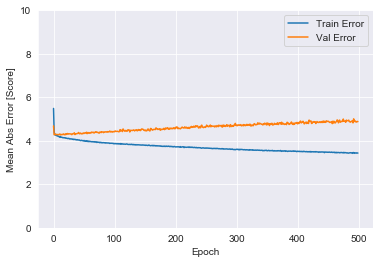

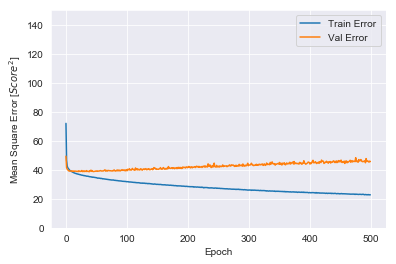

In [81]:
plot_history(history)


...............................................

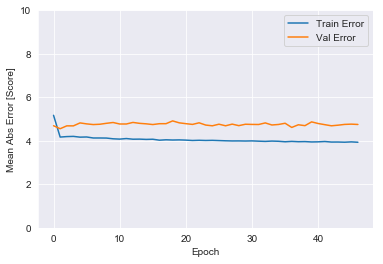

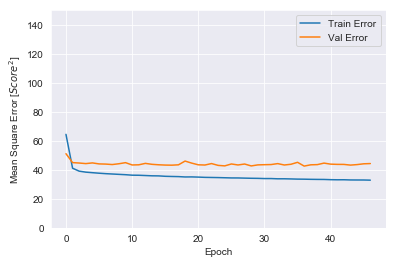

In [82]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_RB, RB_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [83]:
X_test = RBs[RB_train.columns]

In [84]:
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
RBs['DNN'] = new_predictions

In [85]:
X_train = RBtrain.drop('Score', axis=1).astype('float64')
y_train = RBtrain.Score

In [86]:
X_test = RBs[X_train.columns]

In [87]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [88]:
RBNe = neigh.predict(X_test)
RBs['NeProjections'] = RBNe

In [89]:
RBScores = pd.read_csv('Scores/RBScores.csv')
RB = pd.DataFrame({'Name': [], 'Score': []})
RB['Name'] = RBScores['Name']
RB['Score'] = RBScores['FantasyPointsDraftKings']
RB = RB.set_index('Name')
RBs = RBs.join(RB)
RBs = RBs.dropna()
RBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,7400.0,17.26,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,46.3,81.7,36.3,9.6,43.0,46.0,36.3,18.682745,14.84,8.20
Chase Edmonds,3800.0,2.08,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,11.0,19.4,28.1,12.4,38.8,40.5,23.0,3.729230,1.64,20.60
TJ Logan,3000.0,0.22,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,1.4,2.5,0.0,42.9,42.9,42.9,70.0,-1.084081,1.34,0.50
Derrick Coleman,3000.0,0.15,24.13,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,4.5,8.0,4.0,6.0,8.0,10.0,8.0,1.785981,0.32,0.00
Tevin Coleman,4500.0,12.21,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,39.0,57.7,28.4,8.6,35.2,37.1,35.3,11.054063,16.28,2.10
Ito Smith,3400.0,6.63,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,20.5,30.2,28.0,10.7,37.3,38.7,34.8,7.210921,10.22,3.20
Ricky Ortiz,3000.0,0.11,18.30,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,10.6,12.8,0.0,3.2,2.1,3.2,2.8,1.151812,0.74,0.00
Gus Edwards,4800.0,10.95,33.45,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,20.5,29.2,44.7,0.8,45.5,45.5,36.9,10.701236,13.76,8.20
Ty Montgomery,3600.0,7.22,33.45,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,20.8,26.9,18.2,13.9,27.8,32.1,30.7,8.182174,9.08,10.50


In [90]:
y_test = RBs.Score
y_pred = RBs.DNN
mean_squared_error(y_test, y_pred)

39.726058799444665

In [91]:
y_test = RBs.Score
y_pred = RBs.NeProjections
mean_squared_error(y_test, y_pred)

39.46174444444445

In [92]:
WRtrain = pd.read_csv('TrainingBig/WRtrain.csv')

In [93]:
WRtrain = WRtrain.drop('Unnamed: 0', axis=1)
WRtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,...,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000,6134.000000
mean,4.922796,2.992309,52.810890,38.322616,0.247767,6.720000,10.475968,0.138883,0.762604,0.675140,...,55.462194,6.208282,14.930796,91.105702,63.184594,238.746871,6.791832,10.742664,1.579732,88.275024
std,3.187379,2.096309,20.557776,28.360111,0.282339,3.252450,5.139383,0.352498,2.389062,2.067304,...,8.639052,1.310027,2.276132,116.935150,3.453021,23.896800,0.600120,0.748537,0.366019,9.284294
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-7.000000,-7.000000,...,34.800000,3.000000,10.300000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,2.333333,1.250000,42.729167,14.205556,0.000000,4.775893,7.375694,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.062500,60.600000,225.000000,6.400000,10.200000,1.312500,82.000000
50%,4.666667,2.714286,56.332500,34.285714,0.181818,6.933333,10.841429,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.400000,35.625000,63.200000,237.875000,6.800000,10.700000,1.562500,88.000000
75%,7.166667,4.428571,66.666667,56.851190,0.375000,8.733333,13.573750,0.125000,0.166667,0.151099,...,60.000000,7.100000,16.550000,39.562500,64.900000,251.250000,7.200000,11.200000,1.875000,94.000000
max,19.000000,16.000000,100.000000,180.000000,2.000000,26.500000,50.000000,4.000000,31.000000,34.000000,...,88.900000,10.100000,22.300000,419.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [94]:
WR = pd.read_csv('Input/Aggregate/WRAggregate.csv')
WRavg = pd.DataFrame()
WRavg['Name'] = WR['Name']
WRavg['Rank'] = WR['Rank']
WRavg['Team'] = WR['Team']
WRavg['TargetsGame'] = WR['ReceivingTargets'] / WR['Played']
WRavg['RecGame'] = WR['Receptions'] / WR['Played']
WRavg['RecPercentage'] = WR['ReceptionPercentage']
WRavg['RecYardsGame'] = WR['ReceivingYards'] / WR['Played']
WRavg['RecTdGame'] = WR['ReceivingTouchdowns'] / WR['Played']
WRavg['YardsTarget'] = WR['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WR['ReceivingYardsPerReception']
WRavg['RushesGame'] = WR['RushingAttempts'] / WR['Played']
WRavg['RushYardsGame'] = WR['RushingYards'] / WR['Played']
WRavg['YardAttempt'] = WR['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WR['RushingTouchdowns']
WRavg['PointsGame'] = WR['FantasyPointsPerGameDraftKings']
WRavg = WRavg.set_index('Name')
WRavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Adam Thielen,1,MIN,11.454545,8.454545,73.8,103.454545,0.727273,9.0,12.2,0.181818,1.818182,10.0,0,25.9
Tyreek Hill,2,KC,8.545455,5.909091,69.1,100.545455,1.000000,11.8,17.0,1.181818,7.363636,6.2,0,24.3
Julio Jones,3,ATL,11.363636,7.636364,67.2,118.636364,0.272727,10.4,15.5,0.181818,1.090909,6.0,0,23.2
Davante Adams,4,GB,10.363636,7.000000,67.5,92.909091,0.909091,9.0,13.3,0.000000,0.000000,0.0,0,22.8
Michael Thomas,5,NO,8.818182,7.818182,88.7,98.181818,0.727273,11.1,12.6,0.000000,0.000000,0.0,0,22.6


In [95]:
WRRZ = pd.read_csv('Input/RZ/WRRZ.csv')
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZ['Name']
WRRZavg['RZTargetsGame'] = WRRZ['ReceivingTargets'] / WRRZ['Played']
WRRZavg['RZRecGame'] = WRRZ['Receptions'] / WRRZ['Played']
WRRZavg['RZRecPercentage'] = WRRZ['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZ['ReceivingYards'] / WRRZ['Played']
WRRZavg['RZRecTdGame'] = WRRZ['ReceivingTouchdowns'] / WRRZ['Played']
WRRZavg['RZYardsTarget'] = WRRZ['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZ['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZ['RushingAttempts'] / WRRZ['Played']
WRRZavg['RZRushYardsGame'] = WRRZ['RushingYards'] / WRRZ['Played']
WRRZavg['RZYardAttempt'] = WRRZ['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZ['RushingTouchdowns'] / WRRZ['Played']
WRRZavg['RZPointsGame'] = WRRZ['FantasyPointsPerGameDraftKings']
WRRZ = WRRZavg.set_index('Name')
WRRZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Davante Adams,2.181818,1.090909,50.0,11.000000,0.909091,5.0,10.1,0.0,0.0,0.0,0.0,7.6
Michael Thomas,1.727273,1.454545,84.2,10.909091,0.545455,6.3,7.5,0.0,0.0,0.0,0.0,5.8
DeAndre Hopkins,1.545455,0.909091,58.8,7.727273,0.545455,5.0,8.5,0.0,0.0,0.0,0.0,5.0
Adam Thielen,1.454545,1.090909,75.0,6.636364,0.454545,4.6,6.1,0.0,0.0,0.0,0.0,4.6
Tyreek Hill,1.000000,0.818182,81.8,4.090909,0.454545,4.1,5.0,0.0,0.0,0.0,0.0,4.0


In [96]:
WRsnaps = pd.read_csv('Input/Aggregate/WRSnaps.csv')
WRsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Tim White,BAL,WR,3,2,0.7,0.8,0.0,50.0,50.0,50.0,2.4,120.0
1,2,Leonte Carroo,MIA,WR,4,39,9.8,16.0,2.6,7.7,7.7,10.3,18.8,48.2
2,3,Keon Hatcher,OAK,WR,2,2,1.0,1.5,0.0,100.0,50.0,100.0,1.8,90.0
3,4,Curtis Samuel,CAR,WR,8,166,20.8,29.7,3.0,15.1,14.5,18.1,80.4,48.4
4,5,Aldrick Robinson,MIN,WR,9,115,12.8,19.1,0.0,14.8,8.7,14.8,49.0,42.6


In [97]:
WRsnaps = WRsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
WRsnaps = WRsnaps.set_index('Name')

In [98]:
WRDef = pd.DataFrame()
WRDef['Team'] = Defense['Team']
WRDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']
WRDef = WRDef.set_index('Team')
WRDef.head()

,DPointsAllowed
Team,
BAL,30.38
MIN,31.15
JAX,31.16
BUF,29.28
LAC,32.73


In [99]:
WRSalaries = pd.read_csv('Input/Salaries/WRSalaries.csv').dropna()
WRSalaries = WRSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
WRSalaries = WRSalaries.set_index('Opponent')
WRSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
OAK,Tyreek Hill,KC,9100.0,19.69
NE,Adam Thielen,MIN,8000.0,19.31
LAC,Antonio Brown,PIT,7900.0,18.66
CLE,DeAndre Hopkins,HOU,8200.0,18.55
ARI,Davante Adams,GB,7900.0,18.47


In [100]:
WRSalaries = WRSalaries.join(WRDef).join(QBDefense)
WRSalaries = WRSalaries.set_index('Team').join(Vegas).join(WROffense)
WRSalaries.head()


,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Larry Fitzgerald,5100.0,12.05,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,Christian Kirk,4600.0,11.08,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,Chad Williams,3000.0,3.73,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,JJ Nelson,3000.0,2.94,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,Trent Sherfield,3000.0,0.76,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65


In [101]:
WRSalaries = WRSalaries.set_index('Name')
WRSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5100.0,12.05,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
Christian Kirk,4600.0,11.08,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
Chad Williams,3000.0,3.73,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
JJ Nelson,3000.0,2.94,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
Trent Sherfield,3000.0,0.76,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65


In [102]:
WRs = WRSalaries.join(WRavg).join(WRRZ).join(WRsnaps).dropna()
WRs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5100.0,12.05,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,3.6,51.1,90.2,0.0,12.6,7.8,12.6,22.2
Christian Kirk,4600.0,11.08,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,5.0,0.0,1.1,44.5,78.5,0.4,12.3,8.6,12.7,23.1
Chad Williams,3000.0,3.73,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.2,43.8,56.2,0.0,8.9,3.1,8.9,8.1
JJ Nelson,3000.0,2.94,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.0,12.5,22.2,2.2,8.7,5.1,10.9,4.8
Trent Sherfield,3000.0,0.76,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.0,10.8,16.5,0.0,3.5,2.3,3.5,3.7


In [103]:
WRtrain = WRtrain.set_index('Name')

In [104]:
WR_train = WRtrain.drop('Home', axis=1)

train_dataset = WR_train.sample(frac=0.8,random_state=0)
test_dataset = WR_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TargetsGame,4907.0,4.936048,3.212613,0.000000,2.333333,4.666667,7.166667,19.000000
RecGame,4907.0,2.999779,2.109149,0.000000,1.250000,2.727273,4.428571,16.000000
RecPercentage,4907.0,52.706354,20.570615,0.000000,42.650699,56.341667,66.666667,100.000000
RecYardsGame,4907.0,38.294992,28.323711,-2.000000,14.148352,34.333333,56.809091,180.000000
RecTdGame,4907.0,0.247527,0.282053,0.000000,0.000000,0.181818,0.384615,2.000000
YardsTarget,4907.0,6.691472,3.229085,-2.000000,4.766667,6.909091,8.707692,26.500000
RecYardsRec,4907.0,10.424151,5.107859,-2.000000,7.350000,10.800000,13.530303,50.000000
RushesGame,4907.0,0.137038,0.341785,0.000000,0.000000,0.000000,0.125000,4.000000
RushYardsGame,4907.0,0.760353,2.339040,-7.000000,0.000000,0.000000,0.190909,31.000000
YardAttempt,4907.0,0.677112,2.058910,-7.000000,0.000000,0.000000,0.166667,34.000000


In [105]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 40)                2720      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 41        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________



..................................

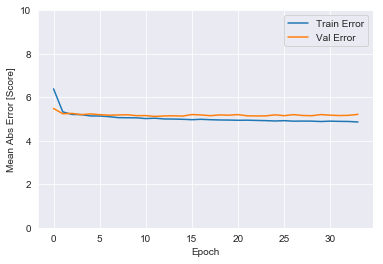

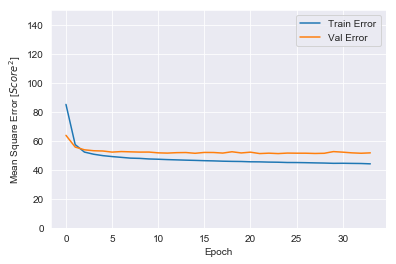

In [106]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [107]:
columns = WR_train.drop('Score', axis=1)
X_test = WRs[columns.columns]
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
WRs['DNN'] = new_predictions

In [108]:
X_train = WRtrain.drop('Score', axis=1).astype('float64')
y_train = WRtrain.Score
X_test = WRs[X_train.columns]
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
WRNe = neigh.predict(X_test)
WRs['NeProjections'] = WRNe

In [109]:
WRScores = pd.read_csv('Scores/WRScores.csv')
WR = pd.DataFrame({'Name': [], 'Score': []})
WR['Name'] = WRScores['Name']
WR['Score'] = WRScores['FantasyPointsDraftKings']
WR = WR.set_index('Name')
WRs = WRs.join(WR)
WRs = WRs.dropna()
WRs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5100.0,12.05,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,51.1,90.2,0.0,12.6,7.8,12.6,22.2,10.356413,10.760,7.8
Christian Kirk,4600.0,11.08,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,44.5,78.5,0.4,12.3,8.6,12.7,23.1,6.312315,10.760,10.7
JJ Nelson,3000.0,2.94,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,12.5,22.2,2.2,8.7,5.1,10.9,4.8,3.428253,1.740,0.0
Trent Sherfield,3000.0,0.76,41.85,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,10.8,16.5,0.0,3.5,2.3,3.5,3.7,3.252999,4.520,3.1
Julio Jones,7700.0,17.72,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,55.2,81.6,0.3,20.6,14.2,20.9,42.1,19.574091,13.920,3.8
Mohamed Sanu,4300.0,10.73,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,52.3,77.3,0.5,10.1,7.8,10.6,20.7,10.147120,15.780,6.7
Calvin Ridley,5400.0,10.64,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,40.7,60.2,1.3,14.7,11.8,16.1,36.2,10.230122,17.460,5.2
Justin Hardy,3000.0,1.30,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,14.5,21.5,0.0,8.1,5.0,8.1,9.6,2.449425,5.640,0.0
Marvin Hall,3000.0,1.27,30.38,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,11.9,17.6,0.8,9.9,7.6,10.7,22.3,2.191668,5.640,0.0


In [110]:
y_test = WRs.Score
y_pred = WRs.DNN
mean_squared_error(y_test, y_pred)

42.80577022782945

In [111]:
y_test = WRs.Score
y_pred = WRs.NeProjections
mean_squared_error(y_test, y_pred)

48.89169046153846

In [112]:
TEtrain = pd.read_csv('TrainingBig/TEtrain.csv')

In [113]:
TEtrain = TEtrain.drop('Unnamed: 0', axis=1)
TEtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,...,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000
mean,3.357002,2.217772,54.539580,24.886990,0.200265,6.040722,8.362418,0.009453,0.031454,0.039095,...,55.514619,6.218298,14.918163,92.593201,63.186563,238.993562,6.798683,10.752667,1.584722,88.315327
std,2.445542,1.698607,21.696732,20.914429,0.247672,3.248117,4.497337,0.048691,0.243980,0.363817,...,8.802992,1.330114,2.284859,118.026452,3.486228,24.296623,0.610951,0.756113,0.372887,9.420878
min,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,-1.000000,...,34.800000,3.000000,10.300000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,1.250000,0.833333,41.035165,8.072802,0.000000,4.000000,5.200000,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.225000,34.062500,60.600000,225.000000,6.400000,10.200000,1.312500,82.000000
50%,2.738636,1.750000,58.338750,19.272727,0.142857,5.973214,8.466758,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.500000,35.625000,63.200000,237.500000,6.800000,10.700000,1.562500,88.000000
75%,5.000000,3.421429,70.000000,37.977273,0.333333,8.000000,11.058333,0.000000,0.000000,0.000000,...,60.000000,7.100000,16.600000,39.562500,64.900000,252.375000,7.200000,11.200000,1.875000,94.000000
max,14.000000,9.000000,100.000000,114.500000,3.000000,33.750000,41.000000,1.000000,5.500000,10.000000,...,88.900000,10.100000,22.300000,419.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [114]:
TEtrain = TEtrain.set_index('Name')

In [115]:
TE_train = TEtrain.drop('Home', axis=1)

train_dataset = TE_train.sample(frac=0.8,random_state=0)
test_dataset = TE_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TargetsGame,2370.0,3.329621,2.426094,0.000000,1.235577,2.727273,5.000000,13.500000
RecGame,2370.0,2.196700,1.684279,0.000000,0.833333,1.750000,3.362013,9.000000
RecPercentage,2370.0,54.389736,21.753503,0.000000,40.744444,58.340833,69.824206,100.000000
RecYardsGame,2370.0,24.540609,20.593263,-0.600000,8.000000,19.196429,37.202381,114.500000
RecTdGame,2370.0,0.198992,0.245985,0.000000,0.000000,0.142857,0.333333,3.000000
YardsTarget,2370.0,5.986355,3.189096,-0.600000,3.962121,5.979808,7.928056,32.000000
RecYardsRec,2370.0,8.285973,4.451403,-0.600000,5.129762,8.459167,11.000000,35.000000
RushesGame,2370.0,0.009553,0.050087,0.000000,0.000000,0.000000,0.000000,1.000000
RushYardsGame,2370.0,0.030216,0.251426,-0.800000,0.000000,0.000000,0.000000,5.500000
YardAttempt,2370.0,0.032124,0.267540,-1.000000,0.000000,0.000000,0.000000,5.500000


In [116]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 40)                2720      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 41        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________



.......................

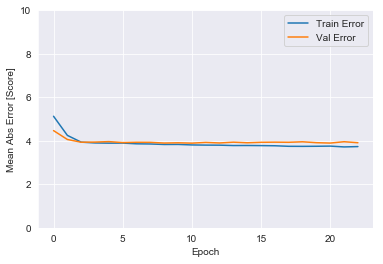

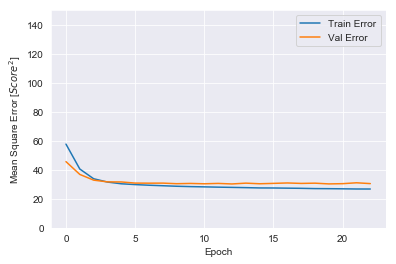

In [117]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [118]:
TE = pd.read_csv('Input/Aggregate/TEAggregate.csv')
TEavg = pd.DataFrame()
TEavg['Name'] = TE['Name']
TEavg['Rank'] = TE['Rank']
TEavg['Team'] = TE['Team']
TEavg['TargetsGame'] = TE['ReceivingTargets'] / TE['Played']
TEavg['RecGame'] = TE['Receptions'] / TE['Played']
TEavg['RecPercentage'] = TE['ReceptionPercentage']
TEavg['RecYardsGame'] = TE['ReceivingYards'] / TE['Played']
TEavg['RecTdGame'] = TE['ReceivingTouchdowns'] / TE['Played']
TEavg['YardsTarget'] = TE['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TE['ReceivingYardsPerReception']
TEavg['RushesGame'] = TE['RushingAttempts'] / TE['Played']
TEavg['RushYardsGame'] = TE['RushingYards'] / TE['Played']
TEavg['YardAttempt'] = TE['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TE['RushingTouchdowns']
TEavg['PointsGame'] = TE['FantasyPointsPerGameDraftKings']
TEavg = TEavg.set_index('Name')
TEavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Zach Ertz,1,PHI,10.090909,7.636364,75.7,81.363636,0.545455,8.1,10.7,0.000000,0.000000,0.0,0,20.1
Travis Kelce,2,KC,9.181818,6.090909,66.3,83.090909,0.636364,9.0,13.6,0.000000,0.000000,0.0,0,19.3
Eric Ebron,3,IND,6.545455,4.000000,61.1,46.181818,1.000000,7.1,11.5,0.181818,0.090909,0.5,1,15.4
George Kittle,4,SF,7.636364,5.090909,66.7,74.818182,0.272727,9.8,14.7,0.090909,0.909091,10.0,0,15.0
Jared Cook,5,OAK,6.363636,4.272727,67.1,55.363636,0.454545,8.7,13.0,0.000000,0.000000,0.0,0,13.1


In [119]:
TERZ = pd.read_csv('Input/RZ/TERZ.csv')
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZ['Name']
TERZavg['RZTargetsGame'] = TERZ['ReceivingTargets'] / TERZ['Played']
TERZavg['RZRecGame'] = TERZ['Receptions'] / TERZ['Played']
TERZavg['RZRecPercentage'] = TERZ['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZ['ReceivingYards'] / TERZ['Played']
TERZavg['RZRecTdGame'] = TERZ['ReceivingTouchdowns'] / TERZ['Played']
TERZavg['RZYardsTarget'] = TERZ['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZ['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZ['RushingAttempts'] / TERZ['Played']
TERZavg['RZRushYardsGame'] = TERZ['RushingYards'] / TERZ['Played']
TERZavg['RZYardAttempt'] = TERZ['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZ['RushingTouchdowns'] / TERZ['Played']
TERZavg['RZPointsGame'] = TERZ['FantasyPointsPerGameDraftKings']
TERZ = TERZavg.set_index('Name')
TERZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Eric Ebron,1.636364,0.909091,55.6,10.181818,0.818182,6.2,11.2,0.181818,0.090909,0.5,0.090909,7.4
Zach Ertz,1.636364,1.000000,61.1,7.363636,0.545455,4.5,7.4,0.000000,0.000000,0.0,0.000000,5.0
Travis Kelce,1.545455,0.909091,58.8,7.545455,0.545455,4.9,8.3,0.000000,0.000000,0.0,0.000000,4.9
Trey Burton,0.909091,0.727273,80.0,3.818182,0.363636,4.2,5.2,0.090909,0.181818,2.0,0.000000,3.5
Jared Cook,1.090909,0.909091,83.3,6.272727,0.272727,5.8,6.9,0.000000,0.000000,0.0,0.000000,3.2


In [120]:
TEsnaps = pd.read_csv('Input/Aggregate/TESnaps.csv')
TEsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Jordan Franks,CIN,TE,2,4,2.0,3.3,0.0,50.0,50.0,50.0,5.7,142.5
1,2,Robert Tonyan Jr.,GB,TE,11,14,1.3,1.9,0.0,14.3,7.1,14.3,12.4,88.6
2,3,Erik Swoope,IND,TE,5,55,11.0,8.8,0.0,14.5,12.7,14.5,33.3,60.5
3,4,Eric Ebron,IND,TE,11,434,39.5,56.1,0.5,16.6,10.8,17.3,169.9,39.1
4,5,Anthony Firkser,TEN,TE,5,51,10.2,17.8,0.0,19.6,19.6,19.6,23.2,45.5


In [121]:
TEsnaps = TEsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
TEsnaps = TEsnaps.set_index('Name')

In [122]:
TEDef = pd.DataFrame()
TEDef['Team'] = Defense['Team']
TEDef['DPointsAllowed'] = Defense['DraftKingsTightEndFantasyPointsAllowedAverage']
TEDef = TEDef.set_index('Team')
TEDef.head()

,DPointsAllowed
Team,
BAL,13.31
MIN,11.80
JAX,13.13
BUF,9.42
LAC,11.11


In [123]:
TESalaries = pd.read_csv('Input/Salaries/TESalaries.csv').dropna()
TESalaries = TESalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
TESalaries = TESalaries.set_index('Opponent')
TESalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
OAK,Travis Kelce,KC,7000.0,17.96
WAS,Zach Ertz,PHI,6600.0,15.92
SEA,George Kittle,SF,5900.0,14.15
JAX,Eric Ebron,IND,4200.0,13.09
MIN,Rob Gronkowski,NE,5400.0,12.46


In [124]:
TESalaries = TESalaries.join(TEDef).join(QBDefense)
TESalaries = TESalaries.set_index('Team').join(Vegas).join(WROffense)
TESalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Ricky Seals-Jones,2900.0,5.15,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,Jermaine Gresham,2500.0,3.24,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,John Phillips,2500.0,0.27,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ARI,Darrell Daniels,2500.0,0.17,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
ATL,Austin Hooper,3900.0,9.56,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,...,49.3,3.096429,64.7,40.162500,71.4,317.475000,7.9,11.1,2.185714,108


In [125]:
TESalaries = TESalaries.set_index('Name')
TESalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,5.15,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
Jermaine Gresham,2500.0,3.24,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
John Phillips,2500.0,0.27,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
Darrell Daniels,2500.0,0.17,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,29.5,1.728387,68.4,29.746452,57.2,155.281935,5.2,9.1,1.091613,65
Austin Hooper,3900.0,9.56,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,49.3,3.096429,64.7,40.162500,71.4,317.475000,7.9,11.1,2.185714,108


In [126]:
TEs = TESalaries.join(TEavg).join(TERZ).join(TEsnaps).dropna()
TEs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,5.15,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.0,37.3,65.8,0.0,12.9,6.3,12.9,14.6
Jermaine Gresham,2500.0,3.24,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.2,30.8,52.8,0.0,3.6,2.9,3.6,5.3
John Phillips,2500.0,0.27,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.0,12.0,20.7,0.0,0.0,0.0,0.0,0.0
Darrell Daniels,2500.0,0.17,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,0.0,0.0,0.0,7.8,10.6,0.0,1.4,0.0,1.4,0.0
Austin Hooper,3900.0,9.56,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,0.0,0.0,3.0,54.7,80.9,0.0,11.3,9.1,11.3,20.4


In [127]:
columns = TE_train.drop('Score', axis=1)
X_test = TEs[columns.columns]
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
TEs['DNN'] = new_predictions

In [128]:
X_train = TEtrain.drop('Score', axis=1).astype('float64')
y_train = TEtrain.Score
X_test = TEs[X_train.columns]
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
TENe = neigh.predict(X_test)
TEs['NeProjections'] = TENe

In [129]:
TEScores = pd.read_csv('Scores/TEScores.csv')
TE = pd.DataFrame({'Name': [], 'Score': []})
TE['Name'] = TEScores['Name']
TE['Score'] = TEScores['FantasyPointsDraftKings']
TE = TE.set_index('Name')
TEs = TEs.join(TE)
TEs = TEs.dropna()
TEs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,5.15,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,37.3,65.8,0.0,12.9,6.3,12.9,14.6,6.608243,2.92,2.0
Jermaine Gresham,2500.0,3.24,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,30.8,52.8,0.0,3.6,2.9,3.6,5.3,4.349144,2.92,0.0
John Phillips,2500.0,0.27,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,12.0,20.7,0.0,0.0,0.0,0.0,0.0,2.020727,2.98,0.0
Darrell Daniels,2500.0,0.17,9.05,24.3,64.162921,355.580899,5.5,20.386517,13.833708,38.2,...,7.8,10.6,0.0,1.4,0.0,1.4,0.0,1.649418,2.98,0.0
Austin Hooper,3900.0,9.56,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,54.7,80.9,0.0,11.3,9.1,11.3,20.4,9.337379,10.46,15.4
Logan Paulsen,2500.0,1.94,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,25.0,37.0,0.0,2.9,2.9,2.9,7.7,-0.451757,5.38,0.0
Eric Saubert,2500.0,0.74,13.31,18.0,62.363636,295.363636,4.7,17.818182,13.818182,34.9,...,7.6,11.3,0.0,7.1,3.6,7.1,7.5,2.888043,0.92,0.0
Mark Andrews,2500.0,5.37,10.75,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,25.5,34.2,0.0,12.1,8.2,12.1,24.4,5.357837,16.62,7.7
Hayden Hurst,2500.0,3.44,10.75,27.9,62.525081,396.598046,6.3,23.446906,11.814332,51.5,...,24.0,33.1,0.6,8.3,4.8,8.9,12.6,5.305381,6.12,0.0


In [130]:
y_test = TEs.Score
y_pred = TEs.DNN
mean_squared_error(y_test, y_pred)

24.331313780167786

In [131]:
y_test = TEs.Score
y_pred = TEs.NeProjections
mean_squared_error(y_test, y_pred)

38.32409545454545